# Neuronale Netze

In dieser Übung schauen wir uns zwei sehr einfache Beispiele für neuronale Netze an. Wenn ihr darüber hinausgehend Interesse an neuronalen Netzen habt, empfehle ich die Lehrveranstaltung "AI 3: Artificial Neural Networks" im Sommersemester.

Falls ihr an der Theorie und den mathematischen Details interessiert seid, ist aus meiner Sicht folgendes Buch sehr empfehlenswert: https://www.deeplearningbook.org/ (u.a. von Yoshua Bengio, der zusammen mit Geoffrey Hinton und Yann LeCun den Turing-Award 2018 für Arbeiten an Deep Learning-Methoden erhalten hat).

Es gibt natürlich eine vielzahl weiterführender praktischer Tutorials für Deep Learning. Aber Achtung: Viele Tutorials zeigen nur sehr knapp, wie man ein neuronales Netz trainiert und evaluiert, ignorieren aber das oft etwas mühsame, aber wichtige Drumherum, also das Vorbereiten des Datensatzes usw. Dieses Tutorial zeigt das hingegen sehr schön: https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

In [94]:
import pandas as pd

df = pd.read_csv("iris.csv", index_col=0)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


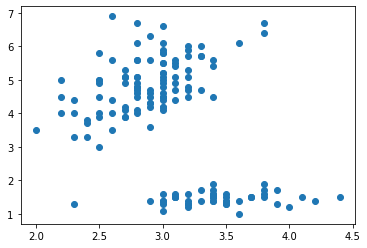

In [109]:
plt.plot(df.SepalWidth.values, df.PetalLength.values,'o')

## Neuronale Netze für Regression



In dieser Übung verwenden wir `keras` für das Training von neuronalen Netzen. Weitere Informationen zu diesem Paket finden Sie hier: https://keras.io/

Die Beispiele, die wir uns in der Übung anschauen, sollten aber (hoffentlich) recht selbsterklärend sein. In dem Beispiel unten beschreiben wir die Netzwerkstruktur in Keras. Dieses Netzwerk besteht nur aus einem einzigen Knoten, die Aktivierungsfunktion ist die Identität. Zudem legen wir fest, dass wir den Mean Squared Error als Loss-Funktion nutzen wollen, und den Adam-Optimizer. 

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Softmax
import matplotlib.pyplot as plt

model = Sequential([ 
    Dense(1,                         # number of units in the layer
          input_shape=(1,),          # shape of the inputs
          activation='linear',       # the unit computes a simple linear (identity function) on its input
          kernel_initializer='ones', # the weights (there is just one in this example) are initialised to 1
          use_bias=False             # the unit does not use a bias term as offset
)])

model.compile(optimizer='adam', loss='mse')


Nun trainieren und evaluieren wir das Modell. Das Array `x` wird später für den Plot der Netzwerkfunktion benötigt. Dann trainieren wir ein Modell mit SepalWidth als Input und PetalLength als Output. Alle 25 Trainingsepochen bestimmen wir die Prädiktion der Werte in `x` mit der Funktion `predict` (diese benötigen wir, um die Netzwerkfunktion zu plotten) und geben den Wert der Loss-Funktion aus. 

Loss after 25 epochs: 4.205177
Loss after 50 epochs: 4.144640
Loss after 75 epochs: 4.132361
Loss after 100 epochs: 4.130443
Loss after 125 epochs: 4.130252
The network's coefficient is: 1.170187


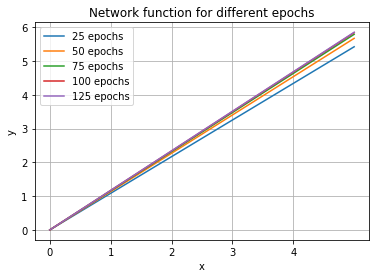

In [103]:
x = np.linspace(0,5,num=100)
# let's train the network for 5 iterations of 25 epochs each ...
iterations = 5
epochs_per_iter = 25
number_of_ephochs_trained=0
for i in range(iterations):
    model.fit(df.SepalWidth, df.PetalLength, epochs=epochs_per_iter, verbose=0)
    number_of_ephochs_trained = number_of_ephochs_trained + epochs_per_iter
    y = model.predict(x)
    l = model.evaluate(df.SepalWidth, df.PetalLength, verbose=0)
    print('Loss after %i epochs: %f' % (number_of_ephochs_trained, l))
    plt.plot(x,y, label="%i epochs" % (number_of_ephochs_trained))

plt.legend()
plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(0, 7, 1))

def show(plt, title=None, xlabel=None, ylabel=None, legend=True, grid=True):
    if title: plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if grid: plt.grid()
    if legend: plt.legend()
    plt.show()
    
def get_coefficient(m):
    return model.layers[0].get_weights()[0][0][0]

def show_coefficient(m):
    print("The network's coefficient is: %5f" % get_coefficient(m))

    
show_coefficient(model)

show(plt, 'Network function for different epochs', 'x', 'y')

*Aufgabe*: Was für eine Funktion stellt dieses Netzwerk dar?

*Aufgabe*: Vergleichen Sie die Ergebnisse mit der linearen Regression von Übung 2. Fügen Sie weitere Neuronen hinzu und verändern Sie die Aktivierungsfunktion. Wie ändert sich die der Loss und die Netzwerkfunktion?

## MNIST
Als nächstes schauen wir uns einen deutlich komplizierteren Datensatz an: MNIST enthält Bilder der Größe 28*28 von handgeschriebenen Ziffern. Die Aufgabe ist es, einen Klassifikator für diese Ziffern zu entwickeln. 

Zunächst laden wir den Datensatz und konvertieren die Klassen-Labels zu Vektoren mit One-Hot-Encoding.

In [17]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Softmax
import matplotlib.pyplot as plt

dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# reshape each image into a vector of length 28*28=784
train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))

train_images, test_images = train_images / 255.0, test_images / 255.0
# turn labels into categories
train_labels_c = to_categorical(train_labels)
test_labels_c  = to_categorical(test_labels)



Dann erstellen wir ein sehr einfaches Netzwerk mit 10 Neuronen und wählen wieder mean squared error als Loss-Funktion (ist das in diesem Fall sinnvoll?)

In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10),
])

In [37]:
model.compile(optimizer='adam',
               loss="mse"
              ,metrics=['accuracy'])

Schließlich trainieren wir das Modell und erreichen eine Validation Accuracy von ca. 84%. 

In [38]:
h = model.fit(train_images, train_labels_c, validation_data=(test_images, test_labels_c), verbose=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0489 - accuracy: 0.8089 - val_loss: 0.0413 - val_accuracy: 0.8457


### Aufgabe
Verbessern Sie das Modell, indem Sie geeignetere Parameter (z.B. Netzwerkarchitektur, Loss-Funktion) wählen. Welche Validation Accuracy erreicht Ihr Modell?